## Rajath Chikkatur Srinivasa - 002552425

In [1]:
#imports and initializations
import re
%matplotlib inline
#importing data science libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import fetch_20newsgroups
from sklearn.pipeline import make_pipeline
#importing metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
#importing classifier types
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
#import feature extrator type
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
#reading the input file
filetext = open('hw_1-text.txt', 'r').read()

1. Write a piece of code using a regular expression in Python to count how many times
the following name appears: CICERO, this regex needs to be case-sensitive. (10 points)

In [ ]:
# regular expression that finds all 6 character words found in this play.
cRE = r"\b[CICERO]{6}\b"
#driverCode that counts the total presence
nameCount = re.findall(cRE, filetext, re.M)
print(f"CICERO is present {len(nameCount)} times.")

CICERO is present 7 times.


2. Write a regular expression in Python that finds all 6 character words found in this play.
(10 points)

In [ ]:
# regular expression that finds all 6 character words found in this play.
lRE = r"\b[a-zA-Z]{6}\b"
#driverCode that lists all 6 character words found in this play
res = re.findall(lRE, filetext)
print('list of all the 6 caracter words found in this play are:\n',res) 
print('total number of all the 6 caracter words found in this play is:\n',len(res)) 

list of all the 6 caracter words found in this play are:
 ['Julius', 'Caesar', 'street', 'Second', 'answer', 'Second', 'indeed', 'mender', 'Second', 'fellow', 'Second', 'cobble', 'Second', 'meddle', 'indeed', 'danger', 'proper', 'Second', 'myself', 'indeed', 'Caesar', 'brings', 'follow', 'wheels', 'blocks', 'stones', 'things', 'hearts', 'Pompey', 'towers', 'Pompey', 'appear', 'sounds', 'shores', 'attire', 'Pompey', 'houses', 'plague', 'lowest', 'stream', 'shores', 'Exeunt', 'basest', 'vanish', 'tongue', 'images', 'matter', 'images', 'Caesar', 'vulgar', 'Caesar', 'Exeunt', 'public', 'CAESAR', 'ANTONY', 'course', 'PORTIA', 'DECIUS', 'BRUTUS', 'CICERO', 'BRUTUS', 'CAESAR', 'Caesar', 'speaks', 'CAESAR', 'CAESAR', 'course', 'ANTONY', 'Caesar', 'CAESAR', 'Forget', 'elders', 'barren', 'ANTONY', 'Caesar', 'CAESAR', 'Caesar', 'CAESAR', 'CAESAR', 'tongue', 'Caesar', 'Caesar', 'Beware', 'CAESAR', 'BRUTUS', 'beware', 'CAESAR', 'before', 'Fellow', 'throng', 'Caesar', 'CAESAR', 'Beware', 'CAESAR', '

3. Write a piece of code that uses a regular expression in Python to count how many
words are capitalized in the first letter only. (20 points)

In [ ]:
# regular expression that identifies the pattern for all first letter only capitalized words
firstCap = r'\b[A-Z][a-z]*\b'
#driverCode that counts the same
res = re.findall(firstCap, filetext, re.M)
print(f'total number of first letter only capitalized words are: {len(res)}')

total number of first letter only capitalized words are: 4376


4. Write a regular expression using groups in Python that extracts all phrases that have
“son of ” and extract/output the answer in a case-insensitive way. For example, for the
following “I am the son of earth”, should find “son of earth” and extract/output “earth”.
(20 points)

In [ ]:
pRE = r'\b(son of (\w+))\b'
extract = re.findall(pRE, filetext, re.IGNORECASE)
print(extract)

[('son of Rome', 'Rome'), ('son of Caesar', 'Caesar'), ('son of Marcus', 'Marcus'), ('son of Marcus', 'Marcus')]


5. Plays are divided in acts, write a regular expression using groups in Python that
extracts the number of each act found in this play in a case-sensitive way. (20 points)

In [ ]:
nRE = r"\bACT (.+)\b"
reGroups = re.findall(nRE, filetext, re.M)
print(reGroups)
print('total number of acts present in the play is:', len(reGroups))
for e, i in enumerate(reGroups, 1):
  print('Number for ACT',e, 'is:', i)

['I', 'II', 'III', 'IV', 'V']
total number of acts present in the play is: 5
Number for ACT 1 is: I
Number for ACT 2 is: II
Number for ACT 3 is: III
Number for ACT 4 is: IV
Number for ACT 5 is: V


6. Write a Python function that takes the file as an input and outputs how many lines end
with: ? , that is a question mark at the end of the line. This function needs to use a
regular expression. (20 points)

In [ ]:
#driverCode
def endLine(fileinput):
  qRE = r".*\?$"
  endRE = re.findall(qRE, filetext, re.M)
  return f"{len(endRE)} lines end with '?'"

In [ ]:
# testing
print(endLine('hw_1-text.txt'))

215 lines end with '?'


7. Using the code from Class 04, train a Random Forest classification model for the same
two newsgroups, generate the confusion matrix, and all the same performance metrics.
(50 points)

In [2]:
#getting news groups
data = fetch_20newsgroups()

In [3]:
# creating training and test sets
categories = ['rec.autos','comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [4]:
#applying randomforestclassifier
model = make_pipeline(TfidfVectorizer(), RandomForestClassifier())
model.fit(train.data, train.target)
labels = model.predict(test.data)

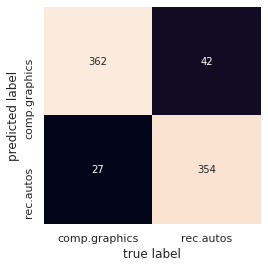

In [5]:
#creating confusion matrix and heatmap
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [6]:
# printing performance metrics
print('Accuracy:',accuracy_score(test.target,labels))
print('Precision:', precision_score(test.target,labels))
print('Recall:', recall_score(test.target,labels))
print('F1 Score:', f1_score(labels, test.target, average='macro'))
print('Mean Absolute Error:', mean_absolute_error(test.target,labels))
print('Mean Squared Error:', mean_squared_error(test.target, labels))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(test.target, labels)))

Accuracy: 0.9121019108280255
Precision: 0.9291338582677166
Recall: 0.8939393939393939
F1 Score: 0.91209278094524
Mean Absolute Error: 0.08789808917197452
Mean Squared Error: 0.08789808917197452
Root Mean Squared Error: 0.2964761190584741


Bonus (15 points): Using the code from Class 04. Write a function to find the best
performing model for the TF-IDF vectorization. The requirements for this are: 1) Pass all
metrics for each model in a single dataframe (each row has a metric value, each column
is a model type). 2) Make the decision of the best model by counting which column has
the highest F1-score and accuracy.

### Naive Bayes - TF-IDF :

In [ ]:
#model execution on previously generated train and test data
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(train.data, train.target)
labels = model.predict(test.data)

In [ ]:
# generating performance metrics for Naive Bayes

acc = accuracy_score(test.target,labels)
pre = precision_score(test.target,labels,pos_label='positive',average='micro')
rec = recall_score(test.target,labels,pos_label='positive',average='micro')
f1 = f1_score(labels, test.target, average='macro')
abserror = mean_absolute_error(test.target,labels)
sqerror = mean_squared_error(test.target, labels)
rerror = np.sqrt(mean_squared_error(test.target, labels))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [ ]:
# model metrics
modelNB = [acc, pre, rec, f1, abserror, sqerror, rerror]

### Perceptron - TF-IDF

In [ ]:
#model execution on previously generated train and test data
model = make_pipeline(TfidfVectorizer(), Perceptron())
model.fit(train.data, train.target)
labels = model.predict(test.data)

In [ ]:
# generating performance metrics for Naive Bayes

acc = accuracy_score(test.target,labels)
pre = precision_score(test.target,labels,pos_label='positive',average='micro')
rec = recall_score(test.target,labels,pos_label='positive',average='micro')
f1 = f1_score(labels, test.target, average='macro')
abserror = mean_absolute_error(test.target,labels)
sqerror = mean_squared_error(test.target, labels)
rerror = np.sqrt(mean_squared_error(test.target, labels))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [ ]:
# model metrics
modelP = [acc, pre, rec, f1, abserror, sqerror, rerror]

## Logiatic Regression - TF-IDF

In [ ]:
#model execution on previously generated train and test data
model = make_pipeline(TfidfVectorizer(), LogisticRegression())
model.fit(train.data, train.target)
labels = model.predict(test.data)

In [ ]:
# generating performance metrics for Naive Bayes

acc = accuracy_score(test.target,labels)
pre = precision_score(test.target,labels,pos_label='positive',average='micro')
rec = recall_score(test.target,labels,pos_label='positive',average='micro')
f1 = f1_score(labels, test.target, average='macro')
abserror = mean_absolute_error(test.target,labels)
sqerror = mean_squared_error(test.target, labels)
rerror = np.sqrt(mean_squared_error(test.target, labels))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [ ]:
# model metrics
modelLR = [acc, pre, rec, f1, abserror, sqerror, rerror]

In [ ]:
#solving bonus question without pandas
# function to find the best performing model for the TF-IDF vectorization
def bestPer(m1,m2,m3):
  # model list containing all other model's metric values in same order as: accuracy, precision, recall, f1-score, absolute-error, man-squared-error, root-mean-squared-error]
  modelL = [m1,m2,m3]
  # index 0 = NaiveBayes; index 1 = Perceptron; index 2 = LogisticRegression
  modeldict = {0:'Naive Bayes', 1:'Perceptron', 2:'Logistic Regression'}
  i_acc = []
  i_acc_sorted = []
  i_f1 = []
  for i in modelL:
    i_acc += [i[0]]
    i_f1 += [i[3]]
    # sorting accuracy list
    for i in range(len(i_acc)):
      for j in range(i+1, len(i_acc)):
        if i_acc[i] > i_acc[j]:
          i_acc[i], i_acc[j] = i_acc[j],i_acc[i]
    # sorting f1 list
    for i in range(len(i_f1)):
      for j in range(i+1, len(i_f1)):
        if i_f1[i] > i_f1[j]:
          i_f1[i], i_f1[j] = i_f1[j],i_f1[i]
    # since the list is sorted, the index of the largest element is equal to the length of the list minus one
    acc_larg = len(i_acc) - 1
    f1_larg = len(i_f1) - 1
  if acc_larg in modeldict:
    r1 = f'the model with largest accuracy is:{modeldict[acc_larg]}'
  if f1_larg in modeldict:
    r2 = f'the model with largest f1 score is:{modeldict[f1_larg]}'
  return r1, r2

In [ ]:
print(bestPer(modelNB, modelP, modelLR))

('the model with largest accuracy is:Logistic Regression', 'the model with largest f1 score is:Logistic Regression')


In [ ]:
#solving bonus question with pandas
def bonusQ(m1,m2,m3):
  df = pd.DataFrame(m1, index=['Accuracy','Precision','Recall','F1 Score','Mean Absolute Error','Mean Squared Error','Root Mean Squared Error'], columns=['Naive_Bayes'])
  df['Perceptron'] = m2
  df['Logistic Regression'] = m3
  return 'The mode with the highest Accuracy score is:', df.iloc[0].idxmax(), 'The mode with the highest F1 score is:', df.iloc[3].idxmax()
print(bonusQ(modelNB,modelP,modelLR))

('The mode with the highest Accuracy score is:', 'Logistic Regression', 'The mode with the highest F1 score is:', 'Logistic Regression')
